# Project 7
### Carter Smith
[Project Repository](https://github.com/cartertrumansmith/datafun-07-ml)

In [47]:
#Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import statistics as stats
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line
Using Pandas data frames to plot a linear relationship, in this case the conversion between Celsius and Fahrenheit temperatures.
The function to be plotted is:
$$
  c = \frac{5}{9}(f-32)
$$

In [48]:
#Using lambda expressions for the function, from Chapter 10.16, Page 416
c = lambda f: 5/9 * (f-32)
temps = [(f,c(f)) for f in range(0,101,10)] #record function values from 0 to 101 in 10 degree increments.

#### Using pandas to plot the function

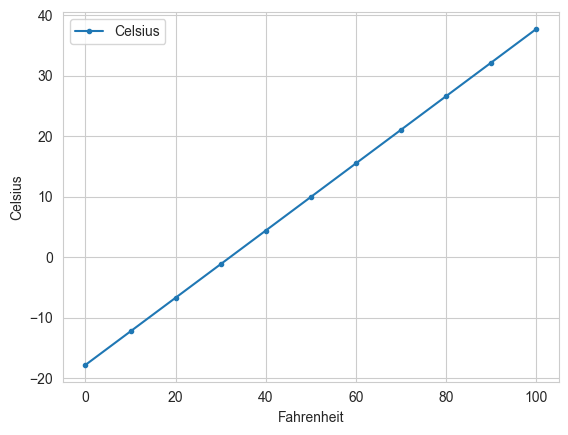

In [49]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit','Celsius'])
axes = temps_df.plot(x='Fahrenheit',y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition
1. Follow the instructions to load NY City January high temperature from a csv file into a DataFrame.
2. Recommended: Rather than nyc, name the dataframe nyc_df to reinforce the DataFrame operations.
3. Recommended: Add all imports to the top of your file, just under the Markdown Introduction. Follow conventions. 

In [50]:
#Load dataset from csv
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection
- View head and tail of the file. 

In [51]:
#display the head of dataset
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [52]:
#display the tail
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning
- Improve the column names and clean up the date series. 

In [53]:
#changed column 'Value' to 'Temperature'
nyc_df.columns = ['Date','Temperature','Anomaly']
nyc_df.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [54]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 4 - Descriptive Statistics
Set the display precision to 2 decimal places. Use 'display.precision' instead of 'precision' as shown in the text.
Use describe() to calculate basic descriptive statistics for the dataset. 

In [55]:
#set precision to 2 decimal places, show descriptive statistics for temperature
pd.set_option('display.precision',2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model
- Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.

In [56]:
lin_reg = stats.linregress(x=nyc_df.Date,y=nyc_df.Temperature)
print(f'Slope: {lin_reg.slope}')
print(f'Intercept: {lin_reg.intercept}')

Slope: 0.014771361132966163
Intercept: 8.694993233674289


### Section 6 - Predict
- Predict the average high temp in Jan for the year 2024.

In [57]:
prediction = lin_reg.slope * 2024 + lin_reg.intercept
print(f'Temperature prediction for 2024: {prediction:.2f}')

Temperature prediction for 2024: 38.59


### Section 7 - Visualizations
- Show the plot of recorded temperatures with a line of best fit for the model.

(10.0, 70.0)

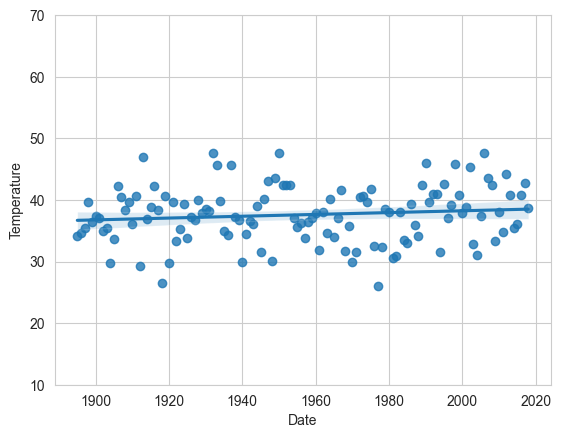

In [58]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10,70)

## Part 3 - Predict Avg High Temp in NYC in January

### Section 1 - Build the Model

In [59]:
#split the data for training
X_train, X_test, y_train, y_test = train_test_split(nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, random_state=11)

#get shape of data
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')


Shape of X_train: (93, 1)
Shape of X_test: (31, 1)


In [60]:
#train the model using linear regression fit
lin_reg = LinearRegression()
lin_reg.fit(X=X_train, y=y_train)

LinearRegression()

In [61]:
print(f'Linear regression coefficient: {lin_reg.coef_}')
print(f'Linear regression intercept: {lin_reg.intercept_}')

Linear regression coefficient: [0.01939167]
Linear regression intercept: -0.30779820252658396


### Section 2 - Test the Model

In [62]:
predicted = lin_reg.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [63]:
#predict the avg high temp for 2024
predict = (lambda x: lin_reg.coef_ * x + lin_reg.intercept_)
print(f'Predicted avg temperature for 2024: {predict(2024)[0]:.2f} degrees celsius')

Predicted avg temperature for 2024: 38.94 degrees celsius


### Section 4 - Visualizations

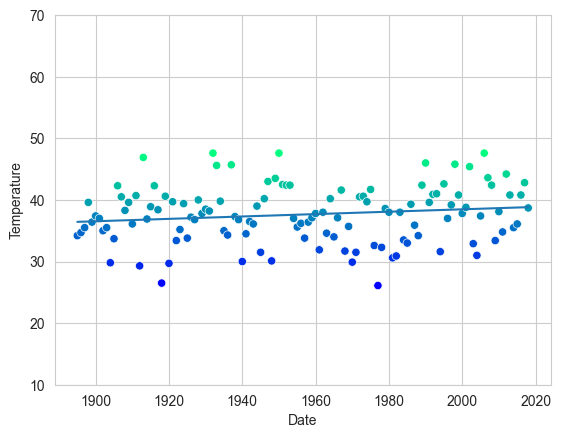

In [64]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x, y)

## Part 4 - Insights
The first method used to predict the average high temp uses the SciPy library, specifically stats. From this we can create a linear regression object with the x being the Date and the y being the temperature. With this linear regression object the slope and intercept can be accessed as attributes, allowing us make predictions using a linear model where in y=mx+b, m is the slope and b is the intercept. This model gives us a predicted temperature for 2024 of 38.59 degrees.

The second method used to predict the average high temperature uses SciKit. The steps to create a prediction model started with splitting the dataframe for training and testing. We then train the model with the LinearRegression() method using the training sets. Similarly to the first method, we are left with a slope and an intercept which we can use to predict for a given year. The prediction for 2024 is 38.94 degrees. Very close to the value predicted using the first method. 